In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
# Import packages
import numpy as np
import random

import pandas as pd
print('Pandas:', pd.__version__)

import networkx as nx
print('NX:', nx.__version__)

import matplotlib.pyplot as plt

Pandas: 1.5.3
NX: 3.1


In [19]:
DATA_PATH = '/content/drive/MyDrive/Teaching/SICSS23/'

FILE_NAME = '{}SICSS-NetworkData - Sheet1 .csv'.format(DATA_PATH)

studentDf = pd.read_csv(FILE_NAME)
studentDf


,NAME,UNIVERSITY,Connection-1,Connection-2,Connection-3,Connection-4,Connection-5
0,Şevval Çakıcı,Özyeğin Üniversitesi,Zeynep Acar,Melek Kübra Çetinel,Azade Eryiğit,Yağmur Çağatay,Ozancan Ozdemir
1,Zeynep Acar,Özyeğin Üniversitesi,Şevval Çakıcı,Yağmur Çağatay,Melek Kübra Çetinel,Leon Oliver Wolf,Neslihan Gurler
2,Dilge Iris Girgin,University of Chicago,Hannah Weytjens,Sudenur Koyuncu,Yağmur Çağatay,Azade Eryiğit,Ahmet Ergurum
3,İlayda Velioğlu,Kadir Has Universitesi,Neslihan Gurler,Azade Eryiğit,Sudenur Koyuncu,Esra Çengel,Benan Kazdağlı
4,Gün Ünal,Ankara Universitesi,Neslihan Gurler,Ayşe Duman,Şevval Çakıcı,Melek Kübra Çetinel,Dilge Iris Girgin
5,Yasser Zouzou,Sabanci Universitesi,NaN,NaN,NaN,NaN,NaN
6,Mustafa Murat Cerit,Turk-Alman Universitesi,NaN,NaN,NaN,NaN,NaN
7,Esra Çengel,Orta Doğu Teknik Üniversitesi,Zeynep Acar,Yağmur Çağatay,Azade Eryiğit,İlayda Velioğlu,Neslihan Gurler
8,Neslihan Gurler,Hacettepe Üniversitesi,İlayda Velioğlu,Benan Kazdağlı,Ozancan Ozdemir,Gevher Yesevi,Esra Çengel
9,Cihan Hulagu,Boğaziçi Üniversitesi,Leon Oliver Wolf,Alper Tunga Şahiner,Ozancan Ozdemir,Ali Najafi,Dilge Iris Girgin


In [24]:
graph = nx.DiGraph()

for idx, row in studentDf.iterrows():
  #print(row)
  for i in range(1,6):
    graph.add_edge(row['NAME'], str(row['Connection-{}'.format(i)]), weight=1/i)
  graph.nodes[row['NAME']]['University'] = row['UNIVERSITY']
  #break

graph.remove_node('nan')
print(graph)

DiGraph with 28 nodes and 125 edges


In [18]:
sorted([str(n) for n in graph.nodes()])

['Ahmet Ergurum',
 'Ali Najafi',
 'Alper Tunga Şahiner',
 'Ayşe Duman',
 'Azade Eryiğit',
 'Benan Kazdağlı',
 'Cihan Hulagu',
 'Dilge Iris Girgin',
 'Esra Çengel',
 'Gevher Yesevi',
 'Gevser Yesevi',
 'Gün Ünal',
 'Hannah Weytjens',
 'Jawwad Shadman Siddique',
 'Leon Oliver Wolf',
 'Melek Kübra Çetinel',
 'Melih Can Yardı',
 'Mustafa Murat Cerit',
 'Neslihan Gurler',
 'Ozancan Ozdemir',
 'Serhat Demirkıran',
 'Sudenur Koyuncu',
 'Süleyman Barış Başaran',
 'Yasser Zouzou',
 'Yağmur Çağatay',
 'Zeynep Acar',
 'nan',
 'İlayda Velioğlu',
 'İsa Ali Demir',
 'Şevval Çakıcı']

In [11]:
for u,v,d in graph.edges(data=True):
  print(u,v,d)

Şevval Çakıcı Zeynep Acar {'weight': 1.0}
Şevval Çakıcı Melek Kübra Çetinel {'weight': 0.5}
Şevval Çakıcı Azade Eryiğit {'weight': 0.3333333333333333}
Şevval Çakıcı Yağmur Çağatay {'weight': 0.25}
Şevval Çakıcı Ozancan Ozdemir {'weight': 0.2}


In [27]:
centrality = nx.betweenness_centrality(graph)
centrality

{'Şevval Çakıcı': 0.03841166351850113,
 'Zeynep Acar': 0.02621871368497549,
 'Melek Kübra Çetinel': 0.007922478755812088,
 'Azade Eryiğit': 0.07072739160008616,
 'Yağmur Çağatay': 0.13619040528622178,
 'Ozancan Ozdemir': 0.060365345031336934,
 'Leon Oliver Wolf': 0.07683900378457284,
 'Neslihan Gurler': 0.06833906521828251,
 'Dilge Iris Girgin': 0.12949265937907414,
 'Hannah Weytjens': 0.04908479834255813,
 'Sudenur Koyuncu': 0.09729939759179525,
 'Ahmet Ergurum': 0.040334654515941065,
 'İlayda Velioğlu': 0.06431506735712765,
 'Esra Çengel': 0.021562933742420923,
 'Benan Kazdağlı': 0.04561662617218173,
 'Gün Ünal': 0.007454890788224122,
 'Ayşe Duman': 0.04022181522181523,
 'Yasser Zouzou': 0.0,
 'Mustafa Murat Cerit': 0.0,
 'Gevher Yesevi': 0.03277863029325016,
 'Cihan Hulagu': 0.015858597842403514,
 'Alper Tunga Şahiner': 0.07628542672402319,
 'Ali Najafi': 0.0,
 'İsa Ali Demir': 0.0424140882193064,
 'Serhat Demirkıran': 0.031732559729635755,
 'Jawwad Shadman Siddique': 0.023494098494

In [30]:
measures = dict()
for measureName, measureFunc in [('betweenness', nx.betweenness_centrality),
                    ('closeness', nx.closeness_centrality),
                    ('eigen', nx.eigenvector_centrality)]:

  measures[measureName] = measureFunc(graph)
print(measures)

{'betweenness': {'Şevval Çakıcı': 0.03841166351850113, 'Zeynep Acar': 0.02621871368497549, 'Melek Kübra Çetinel': 0.007922478755812088, 'Azade Eryiğit': 0.07072739160008616, 'Yağmur Çağatay': 0.13619040528622178, 'Ozancan Ozdemir': 0.060365345031336934, 'Leon Oliver Wolf': 0.07683900378457284, 'Neslihan Gurler': 0.06833906521828251, 'Dilge Iris Girgin': 0.12949265937907414, 'Hannah Weytjens': 0.04908479834255813, 'Sudenur Koyuncu': 0.09729939759179525, 'Ahmet Ergurum': 0.040334654515941065, 'İlayda Velioğlu': 0.06431506735712765, 'Esra Çengel': 0.021562933742420923, 'Benan Kazdağlı': 0.04561662617218173, 'Gün Ünal': 0.007454890788224122, 'Ayşe Duman': 0.04022181522181523, 'Yasser Zouzou': 0.0, 'Mustafa Murat Cerit': 0.0, 'Gevher Yesevi': 0.03277863029325016, 'Cihan Hulagu': 0.015858597842403514, 'Alper Tunga Şahiner': 0.07628542672402319, 'Ali Najafi': 0.0, 'İsa Ali Demir': 0.0424140882193064, 'Serhat Demirkıran': 0.031732559729635755, 'Jawwad Shadman Siddique': 0.023494098494098503, '

In [32]:
for n in graph.nodes():
  for m in measures:
    graph.nodes[n][m] = measures[m][n]

In [33]:
print(graph)

DiGraph with 28 nodes and 125 edges


In [34]:
nx.write_gexf(graph, '{}siccs-students.gexf'.format(DATA_PATH))

In [49]:
SEED_NODE = 'Cihan Hulagu'

infectedNodes, testedNodes = set(), set()
infectedNodes.add(SEED_NODE)

simTime = 0
while len(infectedNodes - testedNodes) > 0:

  testNode = np.random.choice(list(infectedNodes - testedNodes))
  testedNodes.add(testNode)

  succNeig = list(graph.successors(testNode))
  for s in succNeig:
    prob = graph[testNode][s]['weight']
    infProb = 1/(5+prob)
    if np.random.uniform() < infProb:
      infectedNodes.add(s)
  print(simTime, len(infectedNodes), len(testedNodes))
  print(simTime, testNode, succNeig)
  simTime += 1

print('Sim completed at {}ts, {} users got infected'.format(simTime, len(infectedNodes)))

0 3 1
0 Cihan Hulagu ['Leon Oliver Wolf', 'Alper Tunga Şahiner', 'Ozancan Ozdemir', 'Ali Najafi', 'Dilge Iris Girgin']
1 3 2
1 Ozancan Ozdemir ['Alper Tunga Şahiner', 'İsa Ali Demir', 'Neslihan Gurler', 'Cihan Hulagu', 'İlayda Velioğlu']
2 3 3
2 Ali Najafi []
Sim completed at 3ts, 3 users got infected


In [81]:
def simulate_spread(seed_user, inf_factor=5):
  infectedNodes, testedNodes = set(), set()
  infectedNodes.add(seed_user)

  simTime = 0
  while len(infectedNodes - testedNodes) > 0:

    #testNode = np.random.choice(list(infectedNodes - testedNodes))
    testNode = np.random.choice(list(infectedNodes))
    testedNodes.add(testNode)

    succNeig = list(graph.successors(testNode))
    for s in succNeig:
      prob = graph[testNode][s]['weight']
      infProb = 1/(inf_factor+prob)
      if np.random.uniform() > infProb:
        infectedNodes.add(s)
    #print(simTime, len(infectedNodes), len(testedNodes))
    #print(simTime, testNode, succNeig)
    simTime += 1

  #print('Sim completed at {}ts, {} users got infected'.format(simTime, len(infectedNodes)))
  return {'t':simTime, 'N':len(infectedNodes)}

simulate_spread(SEED_NODE, inf_factor=10)


{'t': 124, 'N': 27}

In [84]:
simStats = dict()
for n in graph.nodes():
  temp = list()
  for i in range(100):
    res = simulate_spread(n, inf_factor=1)
    temp.append(res['N'])
  print(n, np.mean(temp), np.median(temp))
  simStats[n] = np.mean(temp)

Şevval Çakıcı 16.7 23.0
Zeynep Acar 19.28 24.0
Melek Kübra Çetinel 18.62 23.5
Azade Eryiğit 17.52 24.0
Yağmur Çağatay 17.45 24.0
Ozancan Ozdemir 18.74 23.0
Leon Oliver Wolf 16.4 24.0
Neslihan Gurler 16.61 22.0
Dilge Iris Girgin 17.33 24.0
Hannah Weytjens 18.96 25.0
Sudenur Koyuncu 20.61 25.0
Ahmet Ergurum 11.88 5.0
İlayda Velioğlu 16.46 23.0
Esra Çengel 19.57 24.0
Benan Kazdağlı 15.73 23.0
Gün Ünal 19.44 25.0
Ayşe Duman 19.19 25.0
Yasser Zouzou 1.0 1.0
Mustafa Murat Cerit 1.0 1.0
Gevher Yesevi 18.24 23.0
Cihan Hulagu 14.98 21.0
Alper Tunga Şahiner 12.92 8.0
Ali Najafi 1.0 1.0
İsa Ali Demir 18.41 23.0
Serhat Demirkıran 10.33 4.0
Jawwad Shadman Siddique 10.91 4.0
Melih Can Yardı 17.29 23.5
Süleyman Barış Başaran 18.49 24.0


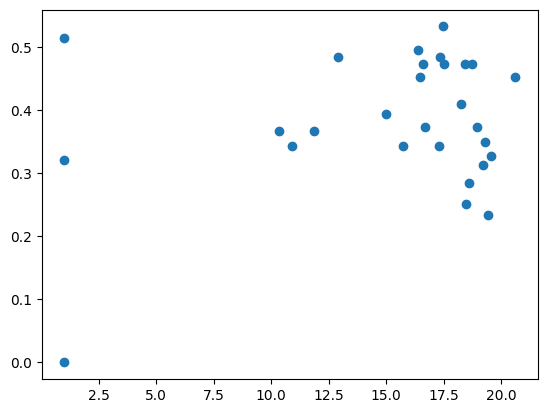

In [87]:
vizData = list()
for n in simStats:
  vizData.append((simStats[n], graph.nodes[n]['closeness']))
vizData = np.array(vizData)

plt.scatter(vizData[:,0], vizData[:,1])